In [1]:
import numpy as np
import json
data_path = "/Users/aodandan/data/tfrecord/feature/first_0506.gandalf"

def parse_feature(f, data):
    for key, val in f.items():
        slot = val["slot"]
        f_val = val["data"]
        feature_name = val["feature_name"]
        key = feature_name + "-" + str(slot)
        #print(key, f_val, type(f_val))
        if key not in data: data[key] = []
        data[key].append(np.float(f_val))
        
    
def load_data(infile, limit_line=None):
    data = {}
    count = 0
    with open(infile, 'r') as fin:
        for line in fin:
            count += 1
            if limit_line != None and count > limit_line: break
            values = line.strip('\r\n').split('\t')
            if len(values) < 6:
                print(line)
                continue
            label = values[1]
            parse_feature(json.loads(values[5]), data)
    return data
       
limit_line = 10000
data = load_data(data_path)
print(data.keys())


dict_keys(['f_porn_score-0', 'f_rudely_score-1', 'f_dup_count_-2', 'f_self_dup_count-3', 'f_length-4', 'f_informative-5', 'f_follower_count-6', 'f_match_word_cnt-7', 'f_non_verb_cnt-8', 'f_avg_segment_len-9', 'f_profile_len-10', 'f_match_word_tfidf-11', 'f_hot_rate-12', 'f_complexity-13', 'f_dnn_title-14', 'f_dnn_keyword-15', 'f_w2v_title-16', 'f_w2v_keyword-17', 'f_cat_mi-18', 'f_ad_score-19', 'f_sentiment-20', 'f_political_score-21', 'f_cheat_report_score-22', 'f_praise_score-23', 'f_title_spam_score-24', 'f_advertorial_score-25', 'f_like_media-26', 'f_porn_group_score_-27', 'f_rudely2_score-28', 'f_uname_ad_score-29', 'f_roi_review_score_-30', 'f_report_count-31', 'f_porn_report_count-32', 'f_ad_report_count-33', 'f_rudely_report_count-34', 'f_strategy_type-35', 'f_negative_score-36', 'f_positive_score-37', 'f_strict_porn_score-38', 'f_strict_manma_score-39', 'f_politics_score-40', 'f_video_strict_porn_score-41', 'f_video_porn_score-42', 'f_contextual_politics_score-43', 'f_unique_t

f_porn_score-0 total: 14636 non nan len: 14636 non nan ratio: 0.0
f_porn_score-0 fvals: 14636 [0.125  0.0036 0.0045 0.0246 0.045 ]
f_porn_score-0 fvals norm: 14636 [2.49688020e-03 7.19974069e-05 8.99959464e-05 4.91878991e-04
 8.99595279e-04]
f_porn_score-0:min=0.0005000000237487257, max=49.890201568603516, mean=0.25903112842893244, median=0.009700000286102295
f_porn_score-0:min=9.999950475347503e-06, max=0.6920485930196077, mean=0.004473740310531695, median=0.0001939811901544477


Text(0.0, 1.0, 'Distribution Function of feature')

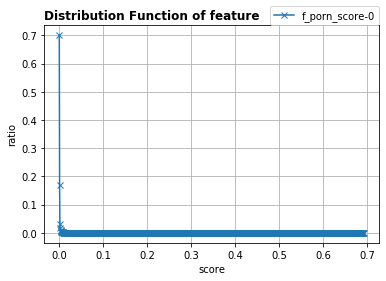

In [2]:
import math
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt



fname = "f_porn_score-0"
raw_fvals = np.asarray(data[fname]) # list
numbins = 1000

# 1.ratio of nan, use non nan val
fvals = np.asarray([value for value in raw_fvals if not math.isnan(value)])
print(fname, "total:", len(raw_fvals), "non nan len:", len(fvals), "non nan ratio:", 1.0-(len(fvals)/len(raw_fvals)))

def cal_mean(fname, fvals):
    mean = np.mean(fvals)
    median = np.median(fvals)
    min_val = np.min(fvals)
    max_val = np.max(fvals)
    print(f"{fname}:min={min_val}, max={max_val}, mean={mean}, median={median}")

# 3.use ln(e, val-mean)
divisor = 50.0
norm_fvals = np.log(fvals/divisor + 1.0)
print(fname, "fvals:", len(fvals), fvals[0:5])
print(fname, "fvals norm:", len(norm_fvals), norm_fvals[0:5])
cal_mean(fname, fvals)
cal_mean(fname, norm_fvals)

# 4.draw curve of distribute 
res = stats.relfreq(norm_fvals, numbins=numbins)
x1 = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
y1 = res.frequency
y1_cum = np.cumsum(res.frequency)


fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (50.0, 50.0)
plt.rcParams['savefig.dpi'] = 1000
plt.rcParams['figure.dpi'] = 1000
plt.xlabel('score')
plt.ylabel('ratio')


plt.plot(x1, y1, "x-", label=fname)
#plt.plot(x1, y1_cum, "|-", label=fname+":cumulatived")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)
plt.title('Distribution Function of feature',fontsize='large', fontweight='bold', loc='left')
